In [4]:
import pandas as pd
import numpy as np
data=pd.read_csv("origindata.csv")
print(data.index)
%matplotlib inline

RangeIndex(start=0, stop=1048575, step=1)


In [5]:
#Index(['flight', 'name', 'date', 'time'], dtype='object')
name_index=set(data["name"].values)
date_index=set(data["date"].values)
flight_index=set(data["flight"].values)
merged_data={}
merged_data["flight"]=[]
merged_data["date"]=[]
for i in name_index:
    merged_data[i]=[]
merged_data

{360.0: [],
 361.0: [],
 364.0: [],
 365.0: [],
 366.0: [],
 367.0: [],
 368.0: [],
 369.0: [],
 370.0: [],
 378.0: [],
 379.0: [],
 380.0: [],
 637.0: [],
 641.0: [],
 644.0: [],
 645.0: [],
 648.0: [],
 649.0: [],
 652.0: [],
 654.0: [],
 655.0: [],
 656.0: [],
 660.0: [],
 661.0: [],
 662.0: [],
 663.0: [],
 664.0: [],
 665.0: [],
 668.0: [],
 669.0: [],
 670.0: [],
 675.0: [],
 676.0: [],
 678.0: [],
 679.0: [],
 680.0: [],
 681.0: [],
 682.0: [],
 683.0: [],
 684.0: [],
 685.0: [],
 'date': [],
 'flight': []}

In [41]:
def str_to_time(str_temp):
    try:
        str_list=str_temp.split(":")
        return int(str_list[0])*60+int(str_list[1])
    except:
        return -1
    
print(1)
data_02=pd.read_csv("02.csv")
#日期转换为数字
# 
# Index(['NO', 'flight', 'date', '641 靠梯桥', '644 清洁完成', '645开货仓', '648 首件行李',
#        '649 最后一件行李', '655 配餐完成', '660 机务完成', '661 通知上客', '662登机开始', '668关货仓 ',
#        '669 撤轮档', '670 牵引车 机务放行', '360预计近机位时间', '361机务完成', '364 引导车到位-删除',
#        '365加油完成 缺失较多', '366牵引完成 缺失较多', '367推算预计起飞', '368开客舱', '369上轮档',
#        '370登机结束', '378 配餐开始 8个', '379清洁开始', '380撤梯桥', '637关客舱', '缺失个数'],
#       dtype='object')
index_list=list(data_02.columns)[3:-1]
print(data.columns)
x=data_02["641 靠梯桥"][1]
print(str_to_time(x))
new_cleaned_data={}
for node_name in index_list:
    data_temp=data_02[node_name]
    new_cleaned_data[node_name]=[]
    for i in range(len(data_02)):
        node_temp=str_to_time(data_temp[i])
        new_cleaned_data[node_name].append(node_temp)
        if i%10000==0:
            print(i)
new_cleaned_data["date"]=list(data_02["date"])
new_cleaned_data["flight"]=list(data_02["flight"])
new_cleaned_data["缺失个数"]=list(data_02["缺失个数"])
pd.DataFrame(new_cleaned_data).to_csv("cleaned02.csv")

1
Index(['flight', 'name', 'date', 'time'], dtype='object')
673
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
0
10000
2000

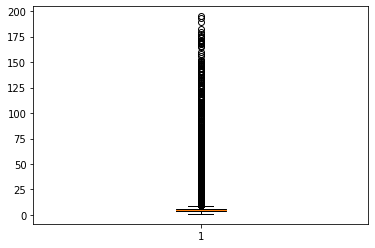

In [7]:
#数据补齐，根据
data_03=pd.read_csv("cleaned02.csv")
#补齐方法，按照航班来，用同一个时刻的航班的数据进行补充
#设定字段补齐的优先级顺序，用哪些字段来查找
#那么第一步就是求字段两两之间的时间差关系分布，用总体数据来求
## 
# Index(['NO', 'flight', 'date', '641 靠梯桥', '644 清洁完成', '645开货仓', '648 首件行李',
#        '649 最后一件行李', '655 配餐完成', '660 机务完成', '661 通知上客', '662登机开始', '668关货仓 ',
#        '669 撤轮档', '670 牵引车 机务放行', '360预计近机位时间', '361机务完成', '364 引导车到位-删除',
#        '365加油完成 缺失较多', '366牵引完成 缺失较多', '367推算预计起飞', '368开客舱', '369上轮档',
#        '370登机结束', '378 配餐开始 8个', '379清洁开始', '380撤梯桥', '637关客舱', '缺失个数'],
#       dtype='object')
#先根据直接关联的分布来补充第一步数据，统计两两直接关联的数据的结果表
#引导车与上轮档数据
def get_diff_of_two_node(A,B):
    data_temp=data_03[["369上轮档","364 引导车到位-删除"]]
    data_temp=data_temp[data_temp["369上轮档"]!=-1]
    data_temp=data_temp[data_temp["364 引导车到位-删除"]!=-1]
    return data_temp["369上轮档"]-data_temp["364 引导车到位-删除"]
x=get_diff_of_two_node(1,2)
import matplotlib.pyplot as plt
y=[]
for i in x:
    if i>0 and i<200:
        y.append(i)
plt.boxplot(y)
plt.show()
y.sort()

In [26]:
#利用就近补充原则，寻找两两变量之间的关系，并且有一个先后顺序，利用条件概率，寻找在当前值为X的时候，另外节点取值最大概率的值作为补充值
#第一步计算一个列表，得到两个变量不为空的一个表，
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.estimators import ParameterEstimator
def get_diff_of_two_node2(A,B):
    data_temp=data_03[[A,B]]
    data_temp=data_temp[data_temp[A]!=-1]
    data_temp=data_temp[data_temp[B]!=-1]
    return data_temp
# A,B="369上轮档","364 引导车到位-删除"
# two_datatest=get_diff_of_two_node2(A,B)
# model = BayesianModel([(A,B)])
# two_nodedata=get_diff_of_two_node2(A,B)
# model.fit(two_nodedata, estimator=MaximumLikelihoodEstimator)
# infer=VariableElimination(model)
# print(infer.map_query([B], evidence={A: 90}))
name_list=[ '641 靠梯桥', '644 清洁完成', '645开货仓', '648 首件行李',
       '649 最后一件行李', '655 配餐完成', '660 机务完成', '661 通知上客', '662登机开始', '668关货仓 ',
       '669 撤轮档', '670 牵引车 机务放行', '360预计近机位时间', '361机务完成', '364 引导车到位-删除',
       '365加油完成 缺失较多', '366牵引完成 缺失较多', '367推算预计起飞', '368开客舱', '369上轮档',
       '370登机结束', '378 配餐开始 8个', '379清洁开始', '380撤梯桥', '637关客舱']
def get_all_cpb_infer_models():
    model_dict={}
    
    for i in range(len(name_list)-1):
        for j in range(i+1,len(name_list)):
            A=name_list[i]
            B=name_list[j]
            name_compare=A+"_"+B
            print(A,B)
            try:
                model = BayesianModel([(A,B)])
                two_nodedata=get_diff_of_two_node2(A,B)
                model.fit(two_nodedata, estimator=MaximumLikelihoodEstimator)
                infer_temp=VariableElimination(model)
                #print(infer_temp.map_query([B], evidence={A: 90})) #查询的代码
                model_dict[name_compare]=[infer_temp]
                
            except:
                print(name_compare,"failed****************")
                model_dict[name_compare]=[-1]
    return model_dict
all_model_cpb=get_all_cpb_infer_models()

641 靠梯桥 644 清洁完成
641 靠梯桥 645开货仓
641 靠梯桥 648 首件行李
641 靠梯桥 649 最后一件行李
641 靠梯桥 655 配餐完成
641 靠梯桥 660 机务完成
641 靠梯桥 661 通知上客
641 靠梯桥 662登机开始
641 靠梯桥 668关货仓 
641 靠梯桥 669 撤轮档
641 靠梯桥 670 牵引车 机务放行
641 靠梯桥 360预计近机位时间
641 靠梯桥 361机务完成
641 靠梯桥 364 引导车到位-删除
641 靠梯桥 365加油完成 缺失较多
641 靠梯桥 366牵引完成 缺失较多
641 靠梯桥 367推算预计起飞
641 靠梯桥 368开客舱
641 靠梯桥 369上轮档
641 靠梯桥 370登机结束
641 靠梯桥 378 配餐开始 8个
641 靠梯桥 379清洁开始
641 靠梯桥 380撤梯桥
641 靠梯桥 637关客舱
644 清洁完成 645开货仓
644 清洁完成 648 首件行李
644 清洁完成 649 最后一件行李
644 清洁完成 655 配餐完成
644 清洁完成 660 机务完成
644 清洁完成 661 通知上客
644 清洁完成 662登机开始
644 清洁完成 668关货仓 
644 清洁完成 669 撤轮档
644 清洁完成 670 牵引车 机务放行
644 清洁完成 360预计近机位时间
644 清洁完成 361机务完成
644 清洁完成 364 引导车到位-删除
644 清洁完成 365加油完成 缺失较多
644 清洁完成 366牵引完成 缺失较多
644 清洁完成 367推算预计起飞
644 清洁完成 368开客舱
644 清洁完成 369上轮档
644 清洁完成 370登机结束
644 清洁完成 378 配餐开始 8个
644 清洁完成 379清洁开始
644 清洁完成 380撤梯桥
644 清洁完成 637关客舱
645开货仓 648 首件行李
645开货仓 649 最后一件行李
645开货仓 655 配餐完成
645开货仓 660 机务完成
645开货仓 661 通知上客
645开货仓 662登机开始
645开货仓 668关货仓 
645开货仓 669 撤轮档
645开货仓 670 牵引车 机务放行
645开货仓 360预计近机位

In [28]:
##下一步设计补齐数据的方法，为每个节点寻找最大相关系数变量，计算相关系数表，根据相关系数的优先级来完成数据的填充
##
for i in range(len(name_list)-1):
        for j in range(i+1,len(name_list)):
            A=name_list[i]
            B=name_list[j]
            name_compare=A+"_"+B
            print(A,B)
            try:
                model = BayesianModel([(A,B)])
                two_nodedata=get_diff_of_two_node2(A,B)
                print(two_nodedata.corr())
            except:
                pass


641 靠梯桥 644 清洁完成
          641 靠梯桥  644 清洁完成
641 靠梯桥   1.00000   0.06947
644 清洁完成  0.06947   1.00000
641 靠梯桥 645开货仓
          641 靠梯桥    645开货仓
641 靠梯桥  1.000000  0.938982
645开货仓   0.938982  1.000000
641 靠梯桥 648 首件行李
           641 靠梯桥  648 首件行李
641 靠梯桥   1.000000  0.819243
648 首件行李  0.819243  1.000000
641 靠梯桥 649 最后一件行李
            641 靠梯桥  649 最后一件行李
641 靠梯桥     1.00000     0.75425
649 最后一件行李  0.75425     1.00000
641 靠梯桥 655 配餐完成
           641 靠梯桥  655 配餐完成
641 靠梯桥   1.000000  0.440671
655 配餐完成  0.440671  1.000000
641 靠梯桥 660 机务完成
           641 靠梯桥  660 机务完成
641 靠梯桥   1.000000 -0.049244
660 机务完成 -0.049244  1.000000
641 靠梯桥 661 通知上客
           641 靠梯桥  661 通知上客
641 靠梯桥   1.000000  0.019331
661 通知上客  0.019331  1.000000
641 靠梯桥 662登机开始
          641 靠梯桥   662登机开始
641 靠梯桥  1.000000  0.489007
662登机开始  0.489007  1.000000
641 靠梯桥 668关货仓 
          641 靠梯桥   668关货仓 
641 靠梯桥  1.000000  0.317873
668关货仓   0.317873  1.000000
641 靠梯桥 669 撤轮档
          641 靠梯桥   669 撤轮档
641 靠梯桥  1.000000  0.1511

In [ ]:
x=[a for a in range(100)]
#构造一元二次方程，非线性关系
def y_x(x):
    return 2*x**2+4
data=pd.DataFrame({'x':x,'y':y})
y=[y_x(i) for i in x]
data.corr()
